In [1]:
## importing libraries
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


Bad key "text.kerning_factor" on line 4 in
C:\Users\Rishi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
dir = "E:\OCR\Train"
train_data = []
img_size = 32
non_chars = ["#","@","$","&"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    print(sub_directory)
    for j in os.listdir(sub_directory):
        count+=1
        if count>4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])


E:\OCR\Train\0
E:\OCR\Train\1
E:\OCR\Train\2
E:\OCR\Train\3
E:\OCR\Train\4
E:\OCR\Train\5
E:\OCR\Train\6
E:\OCR\Train\7
E:\OCR\Train\8
E:\OCR\Train\9
E:\OCR\Train\A
E:\OCR\Train\B
E:\OCR\Train\C
E:\OCR\Train\D
E:\OCR\Train\E
E:\OCR\Train\F
E:\OCR\Train\G
E:\OCR\Train\H
E:\OCR\Train\I
E:\OCR\Train\J
E:\OCR\Train\K
E:\OCR\Train\L
E:\OCR\Train\M
E:\OCR\Train\N
E:\OCR\Train\P
E:\OCR\Train\Q
E:\OCR\Train\R
E:\OCR\Train\S
E:\OCR\Train\T
E:\OCR\Train\U
E:\OCR\Train\V
E:\OCR\Train\W
E:\OCR\Train\X
E:\OCR\Train\Y
E:\OCR\Train\Z


In [3]:
len(train_data)

140000

In [4]:
val_dir = "E:\OCR\Validation"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count>1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [5]:
len(val_data)

15209

In [6]:
random.shuffle(train_data)
random.shuffle(val_data)

In [7]:
train_X = []
train_Y = []
for features, label in train_data:
    #print(features)
    #print(label)
    train_X.append(features)
    train_Y.append(label)

In [8]:
val_X = []
val_Y = []
for feature, label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [9]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [10]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [11]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [12]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [13]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0

In [16]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [17]:
history = model.fit(train_X,train_Y, epochs=20, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/20
4375/4375 [==============================] - 105s 23ms/step - loss: 0.5354 - accuracy: 0.8245 - val_loss: 16.7662 - val_accuracy: 0.0258
Epoch 2/20
4375/4375 [==============================] - 102s 23ms/step - loss: 0.2973 - accuracy: 0.8944 - val_loss: 20.6285 - val_accuracy: 0.0258
Epoch 3/20
4375/4375 [==============================] - 102s 23ms/step - loss: 0.2565 - accuracy: 0.9066 - val_loss: 19.1610 - val_accuracy: 0.0258
Epoch 4/20
4375/4375 [==============================] - 101s 23ms/step - loss: 0.2355 - accuracy: 0.9136 - val_loss: 23.1179 - val_accuracy: 0.0258
Epoch 5/20
4375/4375 [==============================] - 101s 23ms/step - loss: 0.2212 - accuracy: 0.9182 - val_loss: 22.9291 - val_accuracy: 0.0258
Epoch 6/20
4375/4375 [==============================] - 100s 23ms/step - loss: 0.2097 - accuracy: 0.9214 - val_loss: 27.0460 - val_accuracy: 0.0258
Epoch 7/20
4375/4375 [==============================] - 101s 23ms/step - loss: 0.2016 - accuracy: 0.9244 - val_l

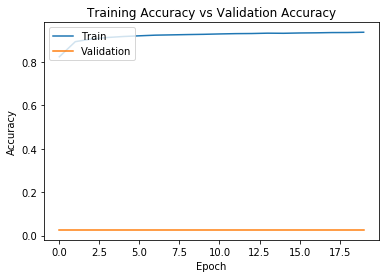

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

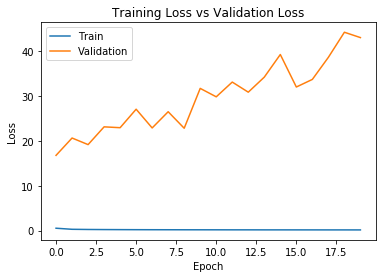

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [21]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [22]:
def get_word(letter):
    word = "".join(letter)
    return word

BEWES


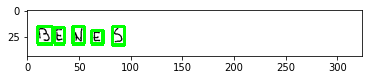

In [24]:
letter,image = get_letters("E:\OCR\Train\TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

LIL0U


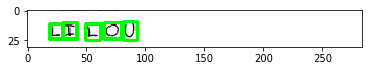

In [26]:
letter,image = get_letters("E:\OCR\Train\TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

JAFFEUX


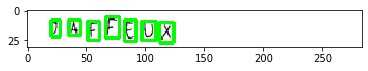

In [27]:
letter,image = get_letters("E:\OCR\Train\TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

RUPP


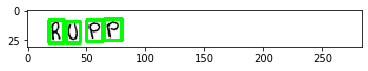

In [29]:
letter,image = get_letters("E:\OCR\Validation\VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

MIJEREMY


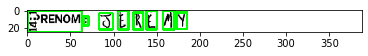

In [38]:
letter,image = get_letters("E:\OCR\Validation\VALIDATION_0009.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

VALENTINE


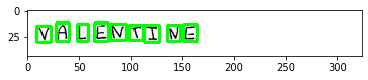

In [30]:
letter,image = get_letters("E:\OCR\TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)